In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## enable Chinese title\label
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/usr/share/fonts/truetype/wqy/wqy-microhei.ttc", size=14)

#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family']='sans-serif'
#plt.rcParams['axes.unicode_minus']=False

sns.set(font="sans-serif")

from IPython.display import display

import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
print('finish loading')

from adjustText import adjust_text

%matplotlib inline

finish loading


# Read data

In [2]:
#df = pd.read_csv('/home/endi/Desktop/work/Performance Score/results/player_rating_system\
#/EPL_16-17/Rating_final_with_player_info.csv')
df = pd.read_csv('EPL16-17.csv')

df['player_id'] = df['player_id'].astype(int)
df['team_id'] = df['team_id'].astype(int)
df['Total'] = df['Total'].astype(int)
df.rename(columns={'Total': 'score'}, inplace=True)

# appeared at least one match
df = df.loc[df['appearance']>90, ]

df.loc[df['position']=='Striker', 'position'] = 'Forward'

# df.loc[df['position']=='Forward', 'position'] = u'前锋'
# df.loc[df['position']=='Midfielder', 'position'] = u'中场'
# df.loc[df['position']=='Defender', 'position'] = u'后卫'
# df.loc[df['position']=='Goalkeeper', 'position'] = u'门将'

In [3]:
df.head(5)

,age,country,player_id,team_id,player_name,team,position,R1,R2,R3,R4,R5,R6,appearance,score
0,28,Chile,37265,3,Alexis Sánchez,Arsenal,Forward,6.854912,5.641199,33.297,10.390,1.00224,1.305219,3346,99
1,25,Denmark,80607,6,Christian Eriksen,Tottenham Hotspur,Midfielder,10.631689,6.837136,17.112,13.507,2.08800,1.212329,3231,98
2,24,England,78830,6,Harry Kane,Tottenham Hotspur,Forward,3.648063,5.398185,38.014,7.273,1.16928,0.663439,2551,96
3,29,Spain,18507,8,Diego Costa,Chelsea,Forward,3.693175,7.167959,29.180,6.234,1.25280,1.520001,3193,95
4,26,Belgium,42786,8,Eden Hazard,Chelsea,Midfielder,8.095612,6.743673,21.985,5.195,2.08800,0.665236,3004,95


In [53]:
df.groupby('team').mean()[['score']].sort_values(by=['score'], ascending=False).round(1)

,score
team,
Tottenham Hotspur,60.8
Liverpool,59.3
Chelsea,58.5
Manchester United,57.5
Arsenal,55.0
Manchester City,53.2
West Bromwich Albion,48.9
Everton,48.9
Bournemouth,48.7


**评分体系原理：**


| 位置           | 指标1:进球、助攻  | 指标2:进攻组织  | 指标3:防守动作  | 指标4:出场时间&获得积分 | 指标5:零封对手   |
| ------------- |:-------------:  | :------------:|:-------------:|:--------------------:|:--------------:|
| 前锋           | ★★★★★           | ★★★           | ★             | ★★★                  | ★             |
| 中场           | ★★★             | ★★★★★         | ★★            | ★★★                  | ★             |
| 后卫           | ★★              | ★★            | ★★★★★         | ★★★                  | ★★            |
| 门将           | ★               | ★             | ★             | ★★★★★                | ★★★★★         |

# plot some nice and insightful graphs

## 1. distribution of score

In [4]:
from scipy.stats import norm

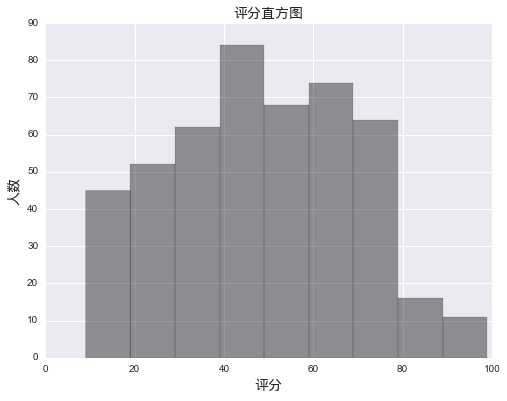

In [5]:
## distribution of scores
fig = plt.figure(figsize=(8, 6))
plt.xlim(0, 100)

ax = sns.distplot(df['score'], kde=False, norm_hist=False, bins=9, color='black')

plt.xlabel(u'评分', fontproperties=font)
plt.ylabel(u'人数', fontproperties=font)
plt.title(u'评分直方图', fontproperties=font)

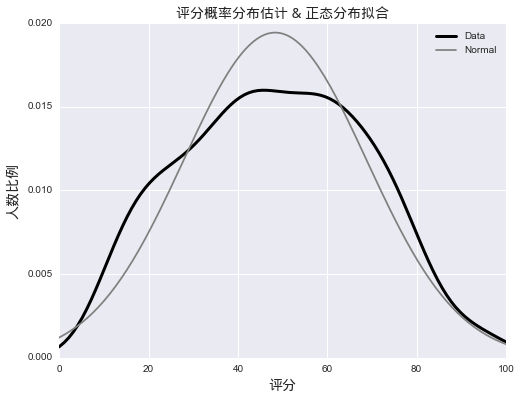

In [6]:
## distribution of scores
fig = plt.figure(figsize=(8, 6))
plt.xlim(0, 100)

ax = sns.distplot(df['score'], kde=True, norm_hist=False, bins=9, fit=norm, hist=False,\
                 kde_kws={"color": "k", "lw": 3, "label": "Data"},
                 fit_kws={"label": "Normal", "color": "gray"})

plt.legend(["Data", "Normal"])
plt.xlabel(u'评分', fontproperties=font)
plt.ylabel(u'人数比例', fontproperties=font)
plt.title(u'评分概率分布估计 & 正态分布拟合', fontproperties=font)

## 2. distribution of scores by position / by team / by......

### by position

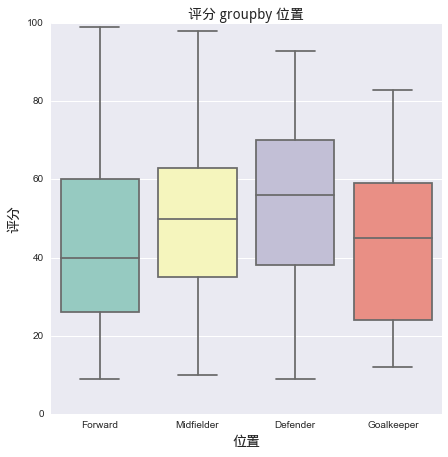

In [25]:
_df = df.loc[df['position']!='Substitute', ]

#_df = _df.loc[_df['team']=='Arsenal', ]

fig = plt.figure(figsize=(7, 7))
sns.boxplot(x='position', y='score', data=_df, palette="Set3", \
            hue_order=['Forward', 'Midfielder', 'Defender', 'Goalkeeper'])

plt.title(u'评分 groupby 位置', fontproperties=font)
plt.xlabel(u'位置', fontproperties=font)
plt.ylabel(u'评分', fontproperties=font)

* 门将评分水平最低，一方面由于替补门将出场时间少，评分低，而主力门将只有一个。另外，在细节方面，包括关键扑救、出击解围等动作无法纳入评分系统中。因此，门将在技术动作方面的优异表现没有得到评分。
* 后卫评分的平均水平最高，由于出场时间比较稳固，但是顶尖球员的评分低于中场、前锋。
* 前锋、中场球员在顶尖球员方面是评分最高的，最亮眼的球星往往是前锋和中场比较多。

### by team

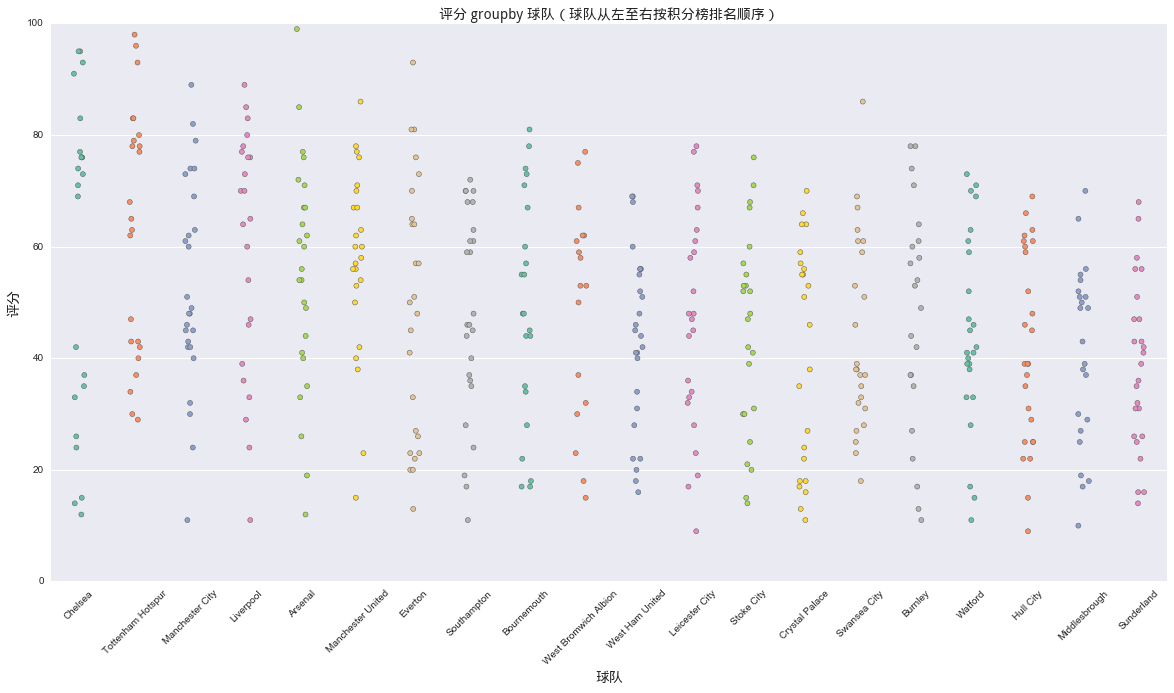

In [40]:
_df = df.loc[df['position']!='Substitute', ]
## ordered by mean socres
#order = _df.groupby('team').mean()['score'].sort_values(ascending=False).index.tolist()
## ordered by true final table
order = ['Chelsea', 'Tottenham Hotspur', 'Manchester City', 'Liverpool', 'Arsenal', 'Manchester United', \
         'Everton', 'Southampton', 'Bournemouth', 'West Bromwich Albion', 'West Ham United', 'Leicester City', \
         'Stoke City', 'Crystal Palace', 'Swansea City', 'Burnley', 'Watford', 'Hull City', 'Middlesbrough', 'Sunderland']

#_df = _df.loc[_df['team']=='Arsenal', ]

fig = plt.figure(figsize=(20, 10))
#sns.boxplot(x='team', y='score', data=_df, palette="Set3", order=order)
#sns.violinplot(x="team", y="score", data=_df, inner=None, color=".8")
sns.stripplot(x='team', y='score', data=_df, palette="Set2", order=order, jitter=0.1, linewidth=0.5)

plt.title(u'评分 groupby 球队（球队从左至右按积分榜排名顺序）', fontproperties=font)
plt.xlabel(u'球队', fontproperties=font)
plt.ylabel(u'评分', fontproperties=font)
plt.ylim(0, 100)

_ = plt.xticks(rotation=45)

#plt.tight_layout()

### by team & position

每支队各位置评分概况


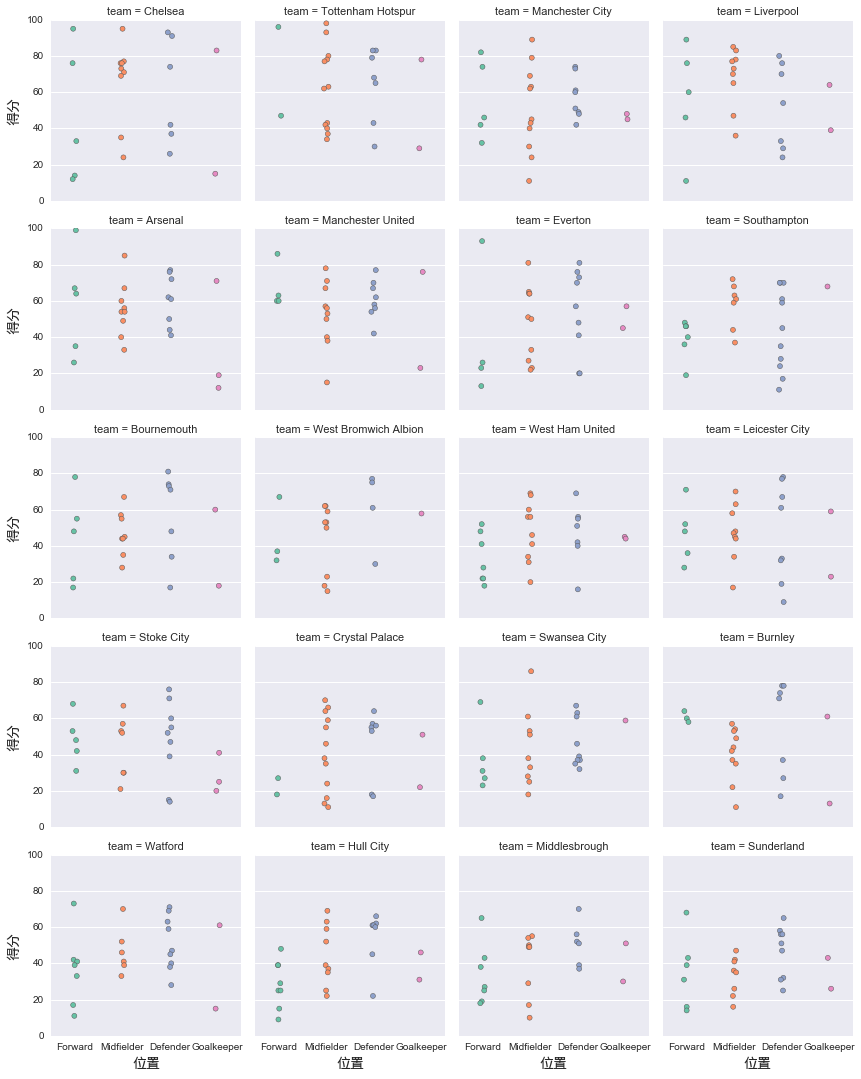

In [39]:
_df = df.loc[df['position']!='Substitute', ]

#_df = _df.loc[(_df['team']=='Chelsea') | (_df['team']=='Tottenham Hotspur') | (_df['team']=='Manchester City') \
#              | (_df['team']=='Liverpool') | (_df['team']=='Arsenal'), ]

g = sns.FacetGrid(_df, col="team", col_wrap=4, size=3.0, ylim=(0, 100), \
                 col_order=order)
g = g.map(sns.stripplot, "position", "score", \
          order=['Forward', 'Midfielder', 'Defender', 'Goalkeeper'], \
          jitter=0.05, palette="Set2", \
          linewidth=0.5).set_xlabels(u'位置', fontproperties=font).set_ylabels(u'得分', fontproperties=font)

print(u'每支队各位置评分概况')
#.set_titles(u'每支队各位置评分概况', fontproperties=font)#palette="Greys"

## 3. play efficiency = score / appearance，最高效率球员

In [26]:
## play efficiency = Total / sqrt(appearance minutes)
_df = df.loc[df['age']>0, ].copy()
_df['efficiency'] = _df['score'].values *10000/ np.square(_df['appearance'].values)#marginal score obtained per minute decreases

_df.sort_values(by=['efficiency'], inplace=True, ascending=False)
_df.reset_index(drop=True, inplace=True)

_df['efficiency'].describe()

count    407.000000
mean       0.799484
std        1.839441
min        0.045534
25%        0.096362
50%        0.187175
75%        0.539962
max       16.620499
Name: efficiency, dtype: float64

In [27]:
import statsmodels.api as sm

## Regression method (score = a + b * appearance) to detect outliers

### Example for using Huber's T norm with the default
### median absolute deviation scaling
x = sm.add_constant(_df['appearance'].values)
y = _df['score'].values
huber_t = sm.RLM(y, x, M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
#hub_results.summary2()

# modify the weight threshold
print((hub_results.weights < 0.6).sum(), 'outliers')

22 outliers


28

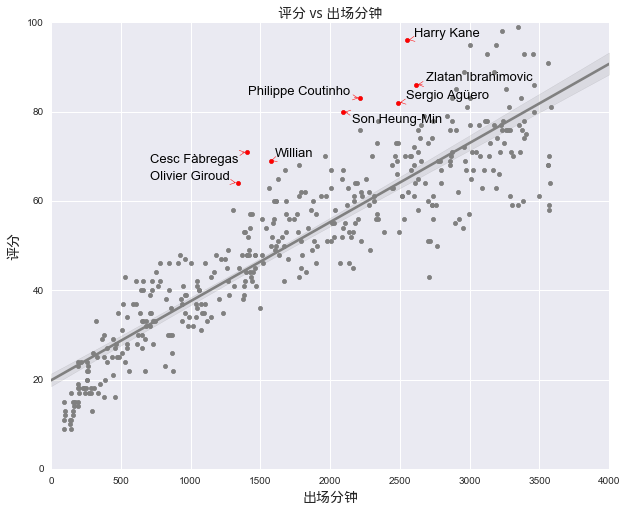

In [28]:
fig = plt.figure(figsize=(10, 8))
plt.xlim(0, 4000)
plt.ylim(0, 100)

sns.regplot(x='appearance', y='score', data=_df, color='grey')

plt.title(u'评分 vs 出场分钟', fontproperties=font)
plt.xlabel(u'出场分钟', fontproperties=font)
plt.ylabel(u'评分', fontproperties=font)


texts = []
for i in _df.index:
    score = _df.loc[i, 'score']
    appearance = _df.loc[i, 'appearance']
    efficiency = _df.loc[i, 'efficiency']
    player_name = _df.loc[i, 'player_name']
    if hub_results.weights[i] < 0.6 and (score > 50 and score < 100) and appearance < 2700:
        #print(player_name)
        plt.scatter(appearance, score, color='red')
        texts.append(plt.text(appearance, score, player_name, color='black', fontsize=13))
    else:
        plt.scatter(appearance, score, color='grey')

adjust_text(texts, precision=0, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

## 4. market value = score / age，市场价值最高年轻球员，球探名单

In [29]:
## age vs score
_df = df.loc[df['age']>0, ].copy()
_df['market_value'] = _df['score'] / (_df['age']) / 4.7

_df.sort_values(by=['score'], inplace=True, ascending=False)

_df['market_value'].describe()

count    407.000000
mean       0.392451
std        0.160824
min        0.051754
25%        0.286594
50%        0.391489
75%        0.503224
max        0.942249
Name: market_value, dtype: float64

25

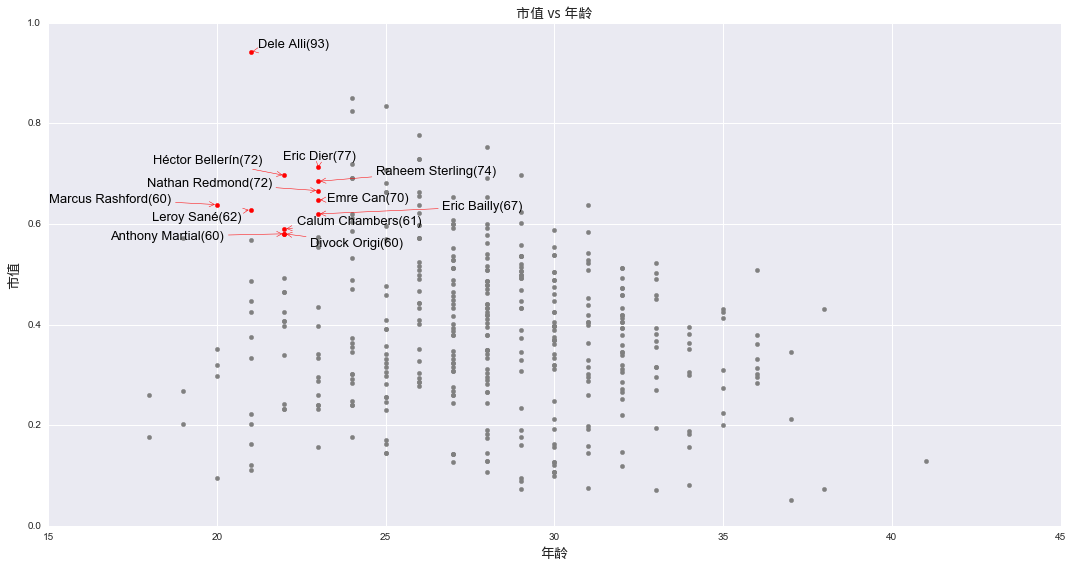

In [30]:
fig = plt.figure(figsize=(15, 8))
plt.xlim(15, 45)
#plt.ylim(0, 100)
plt.ylim(0, 1)

#sns.regplot(x='age', y='market_value', data=_df, fit_reg=False)

texts = []
for i in _df.index:
    score = _df.loc[i, 'score']
    age = _df.loc[i, 'age']
    market_value = _df.loc[i, 'market_value']
    player_name = _df.loc[i, 'player_name']
    
    #if score >= 80 and age >= 30:#older but good players
    #if market_value >= 0.7 and age >= 15:#valuable players
    if market_value >= 0.58 and age <= 23:#young players

        #print(player_name)
        plt.scatter(age, market_value, color='red')
        texts.append(plt.text(age, market_value, player_name+'(%d)'%score, color='black', fontsize=13))
    else:
        plt.scatter(age, market_value, color='grey')

plt.title(u'市值 vs 年龄', fontproperties=font)
plt.xlabel(u'年龄', fontproperties=font)
plt.ylabel(u'市值', fontproperties=font)
plt.tight_layout()
#plt.legend()
adjust_text(texts, precision=0, arrowprops=dict(arrowstyle="->", color='red', lw=0.5))

In [31]:
### 球探名单
report = _df.sort_values(by=['market_value'], ascending=False)[['country', 'player_name', 'team', 'position', \
                                                                'age', 'appearance', 'score', 'market_value']]

report.loc[(report['age']<=23) & (report['score']<=100) & (report['score']>=60), ]

,country,player_name,team,position,age,appearance,score,market_value
6,England,Dele Alli,Tottenham Hotspur,Midfielder,21,3124,93,0.942249
39,England,Eric Dier,Tottenham Hotspur,Midfielder,23,3178,77,0.712303
63,Spain,Héctor Bellerín,Arsenal,Defender,22,2603,72,0.696325
52,England,Raheem Sterling,Manchester City,Forward,23,2643,74,0.684551
64,England,Nathan Redmond,Southampton,Midfielder,23,2961,72,0.666050
78,Germany,Emre Can,Liverpool,Midfielder,23,2466,70,0.647549
155,England,Marcus Rashford,Manchester United,Forward,20,1877,60,0.638298
134,Germany,Leroy Sané,Manchester City,Midfielder,21,1820,62,0.628166
105,Côte d'Ivoire,Eric Bailly,Manchester United,Defender,23,2096,67,0.619796
137,England,Calum Chambers,Arsenal,Defender,22,2313,61,0.589942


In [19]:
# from matplotlib.font_manager import FontManager
# import subprocess

# fm = FontManager()
# mat_fonts = set(f.name for f in fm.ttflist)

# output = subprocess.check_output(
#     'fc-list :lang=zh -f "%{family}\n"', shell=True)
# # print '*' * 10, '系统可用的中文字体', '*' * 10
# # print output
# zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
# available = mat_fonts & zh_fonts

# print('可用的字体')
# for f in available:
#     print(f)